Ассоцияция  - ```Люди, которые покупают это, скорее всего, захотят купить и то.```

Если вы покупаете хлеб, то с большой вероятностью купите и масло, поэтому опытный менеджер по ассортименту знает точно, что скидка на хлеб подтолкнет и продажи масла.

### Стратегии, основанные на данных

Крупные розничные компании опираются на детальный анализ рыночной корзины для выявления ассоциаций между товарами. Используя эту ценную информацию, они могут применять различные стратегии для повышения своих доходов:

- Ассоциированные товары размещают рядом, чтобы побудить покупателей одного продукта к приобретению другого.
- Скидки могут применяться только к одному из ассоциированных товаров.

### Иллюстрация базовых концепций

Предположим, вы открыли свой кафетерий. Как вы будете использовать навыки интеллектуального анализа данных, чтобы понять, какие из продуктов в вашем меню связаны между собой?

Всего у нас есть шесть транзакций с различными покупками, которые наблюдаются в вашем кафетерии:

![](1.png )

Мы можем использовать три основных показателя, которые применяются в обучении ассоциативным правилам, а именно: ```Поддержку (Support), Доверие (Confidence) и Подъем (Lift)```.

### Поддержка (Support)

Поддержка — это простая базовая вероятность того, что событие произойдет. Она измеряется долей транзакций, в которых появляется набор элементов. Говоря иначе, Support(A) — это количество транзакций, включающих A, деленное на общее количество транзакций.

Если проанализировать приведенную выше таблицу транзакций, то поддержка для печенья составляет 3 из 6. То есть, из 6 транзакций покупки, содержащие печенье, произошли 3 раза (это составляет 50%).

![](p1.png )

Поддержка может быть реализована для нескольких продуктов одновременно. Поддержка для печенья и торта составляет 2 из 6.

![](p2.png )

### Доверие (Confidence)
Доверие к последующему событию при наличии предшествующего события можно описать с помощью условной вероятности. Проще говоря, это вероятность наступления события А при условии, что событие В уже произошло.

Этот принцип можно использовать для описания вероятности покупки товара, когда другой товар уже находится в корзине. Показатель доверия измеряется путем деления доли транзакций с товарами X и Y на долю транзакций с товаром Y.

Исходя из приведенной выше таблицы транзакций, доверие {cookie -> cake} ({печенье -> торт}) может быть сформулировано так, как показано ниже:

![](d1.png )

Условную вероятность также можно записать следующим образом:

![](d2.png )

Наконец, мы приходим к решению — 2 из 3. Мы бы могли понять принцип доверия на интуитивном уровне, если рассмотрели бы только транзакции с 1-й по 3-ю. Из 3 случаев покупок печенья, 2 раза его покупали вместе с тортом!

In [2]:
(1/3)/(3/6)

0.6666666666666666

### Подъем (Lift)
Подъем — это отношение наблюдаемого к ожидаемому (сокращенно н/о). Показателем подъема измеряют вероятность того, что товар будет куплен при покупке другого товара, при этом учитывается популярность обоих товаров. Его можно рассчитать, разделив вероятность того, что оба товара окажутся вместе, на произведение вероятностей того, что оба товара окажутся вместе, как если бы между ними не было связи.

![](l1.png )

Значение Lift, равное 1, говорит о том, что оба элемента фактически независимы и никак не связаны между собой. Любое значение Lift, превышающее 1, показывает, что связь существует. Чем выше значение, тем выше степень связи.

Если мы снова взглянем на таблицу, то увидим, что подъем {cookies -> cake} равен 2, следовательно, между печеньями и тортами существует связь.

Теперь, когда мы освоили основные концепции, рассмотрим алгоритм, способный генерировать наборы элементов из транзакционных данных; именно он используется для расчета правил ассоциации.

In [3]:
(1/3)/((3/6)*(2/6))

2.0

### Алгоритм Apriori

Обзор<br>
Алгоритм Apriori — один из самых популярных алгоритмов, используемых в обучении правилам ассоциаций на реляционных базах данных. Он ```определяет элементы в наборе данных и далее расширяет их на все большие и большие наборы элементов```.

Однако алгоритм Apriori расширяется только в том случае, если наборы элементов являются частыми, то есть если существует вероятность того, что набор элементов превышает определенный заранее установленный порог.

Если говорить более формально, то алгоритм Apriori предполагает следующее.

Вероятность того, что набор элементов не является частым, возможна в двух случаях:

- P(I) < минимального порога поддержки, где I — любой непустой набор элементов.
- Любое подмножество в наборе элементов имеет значение меньше минимальной поддержки. <br>
Вторая характеристика определяется как свойство антимонотонности. Вот удачный пример: ```если вероятность покупки бургера ниже минимальной поддержки, то вероятность покупки бургера и картофеля фри также будет ниже минимальной поддержки```.

### Шаги алгоритма Apriori
Приведенная ниже диаграмма иллюстрирует то, как алгоритм Apriori начинает построение с наименьшего набора элементов и далее продвигается вперед.

- Алгоритм начинает с генерации набора элементов с помощью шага Join Step, то есть генерации набора элементов (K+1) из наборов элементов K. Например, на первой итерации алгоритм генерирует Cookie (печенье), Chocolate (шоколад) и Cake (торт).
- Сразу после этого алгоритм переходит к шагу обрезки, то есть удаляет любой набор элементов-кандидатов, который не удовлетворяет требованию минимальной поддержки. Например, алгоритм удалит Cake, если Support(Cake) будет ниже заданного минимального значения Support. <br>
Алгоритм повторяет оба шага до тех пор, пока не останется ни одной возможности расширения.
<br>


---

Набор данных содержит 38765 строк заказов на покупку в продуктовых магазинах.

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

basket = pd.read_csv("Groceries_dataset.csv")
display(basket.head())

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [18]:
basket.shape

(38765, 3)

In [20]:
len(basket['itemDescription'].value_counts())

167

### Группировка по транзакциям
- Набор данных записывает покупки отдельных товаров в строку. Нам необходимо сгруппировать эти покупки по корзинам товаров.
- После этого с помощью TransactionEncoder мы закодируем транзакции в формат, подходящий для функции Apriori.

In [21]:
basket.itemDescription = basket.itemDescription.transform(lambda x: [x])
basket = basket.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
transactions.shape

(14963, 167)

Примечание: датафрейм записывает каждую строку как транзакцию, а товары, которые были куплены в ходе транзакции, будут записаны как True.

### Apriori и правила ассоциаций
Алгоритм Apriori будет использоваться для генерации частых наборов элементов. Мы зададим минимальную поддержку в размере 6 из общего числа транзакций. Генерируются правила ассоциаций, и мы отфильтровываем значения Lift > 1,5.

In [34]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.2)
display(rules.head(20))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(root vegetables),0.004010,0.069572,0.000401,0.100000,1.437368,0.000122,1.033809
1,(root vegetables),(Instant food products),0.069572,0.004010,0.000401,0.005764,1.437368,0.000122,1.001764
2,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854
3,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289
4,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685
5,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922
6,(UHT-milk),(salty snack),0.021386,0.018780,0.000535,0.025000,1.331228,0.000133,1.006380
7,(salty snack),(UHT-milk),0.018780,0.021386,0.000535,0.028470,1.331228,0.000133,1.007291
8,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178
9,(soda),(artif. sweetener),0.097106,0.001938,0.000468,0.004818,2.485725,0.000280,1.002893


Rules identified:  500


<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
C:\Users\BIASPA~1\AppData\Local\Temp/ipykernel_22736/2256969356.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


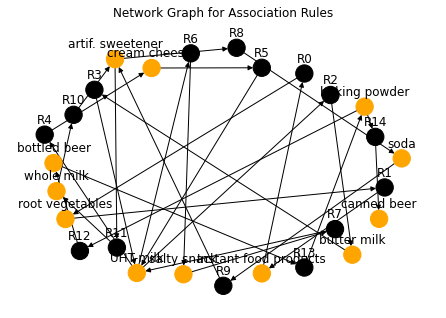

In [35]:
def draw_network(rules, rules_to_show):
  # Ориентированный граф от NetworkX
  network = nx.DiGraph()
  
  # Перебор количества правил для отображения
  for i in range(rules_to_show):
    
    # Добавление узла правила
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Добавление узла-предшественника и ссылки на правило
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Добавление узла-последователя и ссылки на правило
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Расположение узлов с помощью spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Сдвиг расположения текста вверх
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 15)

### Применение алгоритма в бизнесе
Допустим, владельцы магазина закупили слишком много цельного молока и теперь беспокоятся, что товар пропадет, если его не удастся вовремя распродать. Что еще хуже, рентабельность продаж цельного молока настолько низка, что они не могут позволить себе промо-скидку, не потеряв при этом большую часть прибыли.

In [37]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head(20))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868
5,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514
6,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011
7,(finished products),(whole milk),0.004277,0.157923,0.000869,0.203125,1.286229,0.000193,1.056724


Например, мы можем установить промо-скидку на бренди, размягчитель, консервированные фрукты, сироп и искусственный подсластитель. Некоторые ассоциации могут показаться контринтуитивными, но правила гласят, что эти продукты действительно стимулируют продажи цельного молока.

Применяя алгоритм Apriori и анализируя ассоциативные связи, предприятия могут вывести десятки стратегий, основанных на данных, для повышения доходов и прибыли. Правила ассоциаций имеют решающее значение для анализа покупательского поведения в процессе поиска данных. Некоторые из наиболее важных стратегий розничной торговли, такие как анализ клиентов, анализ рыночной корзины и кластеризация продуктов, способны дать ценные сведения в тандеме с анализом правил ассоциаций.

---

In [38]:
#https://github.com/Microsoft/Recommenders